In [2]:
import pandas as pd
import os
from glob import glob
from shutil import copyfile
from tqdm.auto import tqdm

save_dir=os.path.join(os.getcwd(),"words")

dfs=[]
#filename,labels
for i in tqdm(range(1,151)):
    
    folder=os.path.join(os.getcwd(),"bn_htr",f"{i}","Words")
    img_paths=[img_path for img_path in glob(os.path.join(folder,"*/*.*"))]
    for src in img_paths:
        base=os.path.basename(src)
        dst=os.path.join(save_dir,base)
        copyfile(src, dst)



  0%|          | 0/150 [00:00<?, ?it/s]

In [10]:
len(dfs)

150

In [11]:
df=pd.concat(dfs,ignore_index=True)

In [12]:
df

,filename,labels
0,1_1_1_1,কথা
1,1_1_1_2,প্রকাশ
2,1_1_2_1,বৈচিত্র্যময়
3,1_1_2_2,এই
4,1_1_2_3,পৃথিবীর
...,...,...
108142,150_3_21_5,কিন্তু
108143,150_3_21_6,।
108144,150_3_21_7,আপনাকে
108145,150_3_21_8,মনে


In [9]:
for i in tqdm(range(1,151)):
    xlsx=os.path.join(os.getcwd(),"bn_htr",f"{i}",f"{i}.xlsx")
    df=pd.read_excel(xlsx)
    if "Id" in df.columns:
        filename=df["Id"].tolist()
    else:
        filename=df["ID"].tolist()

    if "Word" in df.columns:
        labels=df["Word"].tolist()
    else:
        labels=df["word"].tolist()

    df=pd.DataFrame({"filename":filename,"labels":labels})
    dfs.append(df)


  0%|          | 0/150 [00:00<?, ?it/s]

<ipython-input-9-fecd95c7d126>:3: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  df=pd.read_excel(xlsx)


In [13]:
class GraphemeParser(object):
    '''
    @author: Tahsin Reasat
    Adoptation:MD. Nazmuddoha Ansary
    '''
    def __init__(self):
        self.vds    =['া', 'ি', 'ী', 'ু', 'ূ', 'ৃ', 'ে', 'ৈ', 'ো', 'ৌ']
        self.cds    =['ঁ', 'র্', 'র্য', '্য', '্র', '্র্য', 'র্্র']
        self.roots  =['ং','ঃ','অ','আ','ই','ঈ','উ','ঊ','ঋ','এ','ঐ','ও','ঔ','ক','ক্ক','ক্ট','ক্ত','ক্ল','ক্ষ','ক্ষ্ণ',
                    'ক্ষ্ম','ক্স','খ','গ','গ্ধ','গ্ন','গ্ব','গ্ম','গ্ল','ঘ','ঘ্ন','ঙ','ঙ্ক','ঙ্ক্ত','ঙ্ক্ষ','ঙ্খ','ঙ্গ','ঙ্ঘ','চ','চ্চ',
                    'চ্ছ','চ্ছ্ব','ছ','জ','জ্জ','জ্জ্ব','জ্ঞ','জ্ব','ঝ','ঞ','ঞ্চ','ঞ্ছ','ঞ্জ','ট','ট্ট','ঠ','ড','ড্ড','ঢ','ণ',
                    'ণ্ট','ণ্ঠ','ণ্ড','ণ্ণ','ত','ত্ত','ত্ত্ব','ত্থ','ত্ন','ত্ব','ত্ম','থ','দ','দ্ঘ','দ্দ','দ্ধ','দ্ব','দ্ভ','দ্ম','ধ',
                    'ধ্ব','ন','ন্জ','ন্ট','ন্ঠ','ন্ড','ন্ত','ন্ত্ব','ন্থ','ন্দ','ন্দ্ব','ন্ধ','ন্ন','ন্ব','ন্ম','ন্স','প','প্ট','প্ত','প্ন',
                    'প্প','প্ল','প্স','ফ','ফ্ট','ফ্ফ','ফ্ল','ব','ব্জ','ব্দ','ব্ধ','ব্ব','ব্ল','ভ','ভ্ল','ম','ম্ন','ম্প','ম্ব','ম্ভ',
                    'ম্ম','ম্ল','য','র','ল','ল্ক','ল্গ','ল্ট','ল্ড','ল্প','ল্ব','ল্ম','ল্ল','শ','শ্চ','শ্ন','শ্ব','শ্ম','শ্ল','ষ',
                    'ষ্ক','ষ্ট','ষ্ঠ','ষ্ণ','ষ্প','ষ্ফ','ষ্ম','স','স্ক','স্ট','স্ত','স্থ','স্ন','স্প','স্ফ','স্ব','স্ম','স্ল','স্স','হ',
                    'হ্ন','হ্ব','হ্ম','হ্ল','ৎ','ড়','ঢ়','য়']

        

    def word2grapheme(self,word):
        graphemes = []
        grapheme = ''
        i = 0
        while i < len(word):
            grapheme += (word[i])
            # print(word[i], grapheme, graphemes)
            # deciding if the grapheme has ended
            if word[i] in ['\u200d', '্']:
                # these denote the grapheme is contnuing
                pass
            elif word[i] == 'ঁ':  
                # 'ঁ' always stays at the end
                graphemes.append(grapheme)
                grapheme = ''
            elif word[i] in list(self.roots) + ['়']:
                # root is generally followed by the diacritics
                # if there are trailing diacritics, don't end it
                if i + 1 == len(word):
                    graphemes.append(grapheme)
                elif word[i + 1] not in ['্', '\u200d', 'ঁ', '়'] + list(self.vds):
                    # if there are no trailing diacritics end it
                    graphemes.append(grapheme)
                    grapheme = ''

            elif word[i] in self.vds:
                # if the current character is a vowel diacritic
                # end it if there's no trailing 'ঁ' + diacritics
                # Note: vowel diacritics are always placed after consonants
                if i + 1 == len(word):
                    graphemes.append(grapheme)
                elif word[i + 1] not in ['ঁ'] + list(self.vds):
                    graphemes.append(grapheme)
                    grapheme = ''

            i = i + 1
            # Note: df_cd's are constructed by df_root + '্'
            # so, df_cd is not used in the code

        return graphemes


In [14]:
import string
# symbols to avoid 
SYMBOLS = ['`','~','!','@','#','$','%',
           '^','&','*','(',')','_','-',
           '+','=','{','[','}','}','|',
           '\\',':',';','"',"'",'<',
           ',','>','.','?','/',
           '১','২','৩','৪','৫','৬','৭','৮','৯','০',
           '।']
SYMBOLS+=list(string.ascii_letters)
SYMBOLS+=[str(i) for i in range(10)]
GP=GraphemeParser()

In [18]:
def check(x):
    x=str(x)
    if not any(substring in x for substring in SYMBOLS):
        return GP.word2grapheme(x)
    else:
        return None
tqdm.pandas()
df.labels=df.labels.progress_apply(lambda x:check(x))
df

  0%|          | 0/108147 [00:00<?, ?it/s]

,filename,labels
0,1_1_1_1,"[ক, থা]"
1,1_1_1_2,"[প্র, কা, শ]"
2,1_1_2_1,"[বৈ, চি, ত্র্য, ম, য়]"
3,1_1_2_2,"[এ, ই]"
4,1_1_2_3,"[পৃ, থি, বী, র]"
...,...,...
108142,150_3_21_5,"[কি, ন্তু]"
108143,150_3_21_6,None
108144,150_3_21_7,"[আ, প, না, কে]"
108145,150_3_21_8,"[ম, নে]"


In [19]:
df.dropna()

,filename,labels
0,1_1_1_1,"[ক, থা]"
1,1_1_1_2,"[প্র, কা, শ]"
2,1_1_2_1,"[বৈ, চি, ত্র্য, ম, য়]"
3,1_1_2_2,"[এ, ই]"
4,1_1_2_3,"[পৃ, থি, বী, র]"
...,...,...
108141,150_3_21_4,"[ন, য়]"
108142,150_3_21_5,"[কি, ন্তু]"
108144,150_3_21_7,"[আ, প, না, কে]"
108145,150_3_21_8,"[ম, নে]"


In [21]:
df.dropna(inplace=True)

In [22]:
df

,filename,labels
0,1_1_1_1,"[ক, থা]"
1,1_1_1_2,"[প্র, কা, শ]"
2,1_1_2_1,"[বৈ, চি, ত্র্য, ম, য়]"
3,1_1_2_2,"[এ, ই]"
4,1_1_2_3,"[পৃ, থি, বী, র]"
...,...,...
108141,150_3_21_4,"[ন, য়]"
108142,150_3_21_5,"[কি, ন্তু]"
108144,150_3_21_7,"[আ, প, না, কে]"
108145,150_3_21_8,"[ম, নে]"


In [69]:
df.filename=df.filename.progress_apply(lambda x:x.strip())
df

  0%|          | 0/91606 [00:00<?, ?it/s]

,filename,labels
0,1_1_1_1.png,"[ক, থা]"
1,1_1_1_2.png,"[প্র, কা, শ]"
2,1_1_2_1.png,"[বৈ, চি, ত্র্য, ম, য়]"
3,1_1_2_2.png,"[এ, ই]"
4,1_1_2_3.png,"[পৃ, থি, বী, র]"
...,...,...
108141,150_3_21_4.png,"[ন, য়]"
108142,150_3_21_5.png,"[কি, ন্তু]"
108144,150_3_21_7.png,"[আ, প, না, কে]"
108145,150_3_21_8.png,"[ম, নে]"


In [25]:
df.to_csv("labels.csv",index=False)

In [79]:
ll=[]
for l in df.labels.tolist():
    ll+=l


In [80]:
ll=sorted(list(set(ll)))

In [81]:
len(ll)

1062

In [73]:
df.labels=df.labels.progress_apply(lambda x: [i.strip() for i in x])

  0%|          | 0/91606 [00:00<?, ?it/s]

In [74]:
df

,filename,labels
0,1_1_1_1.png,"[ক, থা]"
1,1_1_1_2.png,"[প্র, কা, শ]"
2,1_1_2_1.png,"[বৈ, চি, ত্র্য, ম, য়]"
3,1_1_2_2.png,"[এ, ই]"
4,1_1_2_3.png,"[পৃ, থি, বী, র]"
...,...,...
108141,150_3_21_4.png,"[ন, য়]"
108142,150_3_21_5.png,"[কি, ন্তু]"
108144,150_3_21_7.png,"[আ, প, না, কে]"
108145,150_3_21_8.png,"[ম, নে]"


In [41]:
d=[
 'অ্য',
 'অ্যা',
 'আঁ',
 'আা',
 'আ্ও',
 'আ্যা']

  0%|          | 0/91606 [00:00<?, ?it/s]

আ্যা


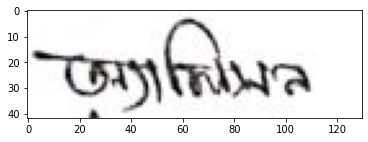

আ্যা


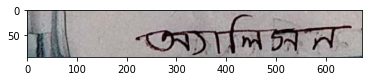

In [76]:
import cv2
import matplotlib.pyplot as plt
for i in tqdm(range(len(df))):
    ll=df.iloc[i,1]
    ii=df.iloc[i,0]
    img_path="/media/ansary/DriveData/Work/bengalAI/datasets/RecognizerTraining/words/"+ii
    for l in ll:
        if l in ['আ্যা']:
            try:
                print(l)
                img=cv2.imread(img_path)
                plt.imshow(img)
                plt.show()
            except Exception as e:
                print(img_path)
        

In [55]:
df.filename=df.filename.progress_apply(lambda x: x.replace(".JPG",".png"))

  0%|          | 0/91860 [00:00<?, ?it/s]

In [60]:
os.path.exists("/media/ansary/DriveData/Work/bengalAI/datasets/RecognizerTraining/words/54_2_23_1.png")

True

In [62]:
df.labels=df.labels.progress_apply(lambda x:"".join(x))
df

  0%|          | 0/91860 [00:00<?, ?it/s]

,filename,labels
0,1_1_1_1.png,কথা
1,1_1_1_2.png,প্রকাশ
2,1_1_2_1.png,বৈচিত্র্যময়
3,1_1_2_2.png,এই
4,1_1_2_3.png,পৃথিবীর
...,...,...
108141,150_3_21_4.png,নয়
108142,150_3_21_5.png,কিন্তু
108144,150_3_21_7.png,আপনাকে
108145,150_3_21_8.png,মনে


In [63]:
#-*- coding: utf-8 -*-
"""
@author:MD.Nazmuddoha Ansary
"""
from __future__ import print_function
#-------------------------------------------
# imports
#-------------------------------------------
import pandas as pd
#-------------------------------------------
# cleaner class
#-------------------------------------------
class WordCleaner(object):
    def __init__(self):
        # components    
        '''
            this division of vowel, consonant and modifier is done according to :https://bn.wikipedia.org/wiki/%E0%A7%8E 
        '''
        self.vowels                 =   ['অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'এ', 'ঐ', 'ও', 'ঔ']
        self.consonants             =   ['ক', 'খ', 'গ', 'ঘ', 'ঙ', 
                                         'চ', 'ছ','জ', 'ঝ', 'ঞ', 
                                         'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 
                                         'ত', 'থ', 'দ', 'ধ', 'ন', 
                                         'প', 'ফ', 'ব', 'ভ', 'ম', 
                                         'য', 'র', 'ল', 'শ', 'ষ', 
                                         'স', 'হ','ড়', 'ঢ়', 'য়']
        self.modifiers              =   ['ঁ', 'ং', 'ঃ','ৎ']
        # diacritics
        self.vowel_diacritics       =   ['া', 'ি', 'ী', 'ু', 'ূ', 'ৃ', 'ে', 'ৈ', 'ো', 'ৌ']
        self.consonant_diacritics   =   ['ঁ', 'র্', 'র্য', '্য', '্র', '্র্য', 'র্্র']
        # special charecters
        self.nukta                  =   '়'
        self.hosonto                =   '্'
        self.special_charecters     =   [self.nukta,self.hosonto,'\u200d']
        
        # all valid unicode charecters
        self.valid_unicodes         =   self.vowels+self.consonants+self.modifiers+self.vowel_diacritics+self.special_charecters
        
        
        '''
            some cases to handle
        '''
        
        # invalid unicodes for starting
        '''
            no vowel diacritic, consonant diacritic , special charecter or modifier can start a word
        '''   
        self.invalid_unicodes_for_starting_a_word=self.modifiers+self.vowel_diacritics+self.special_charecters+self.consonant_diacritics
        
        
        
        # invalid hosonto cases
        '''
            a hosonto can not come before:
                * the vowels
                * another hosonto [double consecutive hosonto]
            a hosonto can not come after:
                * the vowels
                * the modifiers
                * another hosonto [double consecutive hosonto] 
        '''
        self.invalid_unicodes_after_hosonto     =       self.vowels+[self.hosonto]
        self.invalid_unicodes_before_hosonto    =       self.vowels+self.modifiers+[self.hosonto]
        
        
        
        # to+hosonto case
        '''
            case-1:     if 'ত'+hosonto is followed by anything other than a consonant the word is an invalid word
            case-2:     The ত্‍ symbol which should be replaced by a 'ৎ' occurs for all consonants except:ত,থ,ন,ব,ম,য,র
                        # code to verify this manually 
                        for c in self.consonants:
                            print('ত'+self.hosonto+c)
 
        '''
        self.valid_consonants_after_to_and_hosonto      =       ['ত','থ','ন','ব','ম','য','র'] 
       

    def __replaceDiacritics(self):
        '''
            case: replace  diacritic 
                # Example-1: 
                (a)'আরো'==(b)'আরো' ->  False 
                    (a) breaks as:['আ', 'র', 'ে', 'া']
                    (b) breaks as:['আ', 'র', 'ো']
                # Example-2:
                (a)পৌঁছে==(b)পৌঁছে ->  False
                    (a) breaks as:['প', 'ে', 'ৗ', 'ঁ', 'ছ', 'ে']
                    (b) breaks as:['প', 'ৌ', 'ঁ', 'ছ', 'ে']
                # Example-3:
                (a)সংস্কৄতি==(b)সংস্কৃতি ->  False
                    (a) breaks as:['স', 'ং', 'স', '্', 'ক', 'ৄ', 'ত', 'ি']
                    (b) breaks as:['স', 'ং', 'স', '্', 'ক', 'ৃ', 'ত', 'ি']
                
                            
        '''
        # broken vowel diacritic
        # e-kar+a-kar = o-kar
        self.word = self.word.replace('ে'+'া', 'ো')
        # e-kar+e-kar = ou-kar
        self.word = self.word.replace('ে'+'ৗ', 'ৌ')
        # 'অ'+ 'া'-->'আ'
        self.word = self.word.replace('অ'+ 'া','আ')
        # unicode normalization of 'ৄ'-> 'ৃ'
        self.word = self.word.replace('ৄ','ৃ')
        
    def __createDecomp(self):
        '''
            create list of valid unicodes
        '''
        self.decomp=[ch for ch in self.word if ch in self.valid_unicodes]
        if not self.__checkDecomp():
            self.return_none=True

    def __checkDecomp(self):
        '''
            checks if the decomp has a valid length
        '''
        if len(self.decomp)>0:
            return True
        else:
            return False

            

    def __cleanInvalidEnds(self):
        '''
            cleans a word that has invalid ending i.e ends with '্' that does not make any sense
        '''
        while self.decomp[-1] == self.hosonto:
            self.decomp=self.decomp[:-1]
            if not self.__checkDecomp():
                self.return_none=True
                break 


    def __cleanInvalidStarts(self):
        '''
            cleans a word that has invalid starting
        '''
        while self.decomp[0] in self.invalid_unicodes_for_starting_a_word:
            self.decomp=self.decomp[1:]
            if not self.__checkDecomp():
                self.return_none=True
                break 

            

    def __cleanNuktaUnicode(self):
        '''
            handles nukta unicode as follows:
                * If the connecting char is with in the valid list ['য','ব','ড','ঢ'] then replace with ['য়','র','ড়', 'ঢ়']
                * Otherwise remove the nukta char completely
            **the connecting char**: is defined as the previous non-vowle-diacritic char 
            Example-1:If case-1
            (a)কেন্দ্রীয়==(b)কেন্দ্রীয় ->  False
                (a) breaks as:['ক', 'ে', 'ন', '্', 'দ', '্', 'র', 'ী', 'য', '়']
                (b) breaks as:['ক', 'ে', 'ন', '্', 'দ', '্', 'র', 'ী', 'য়']
            Example-2:Elif case-2
            (a)রযে়ছে==(b)রয়েছে ->  False
                (a) breaks as:['র', 'য', 'ে', '়', 'ছ', 'ে']
                (b) breaks as:['র', 'য়', 'ে', 'ছ', 'ে']
            Example-3:Otherwise 
            (a)জ়ন্য==(b)জন্য ->  False
                (a) breaks as:['জ', '়', 'ন', '্', 'য']
                (b) breaks as:['জ', 'ন', '্', 'য']
        '''            
        __valid_charecters_without_nukta    =   ['য','ব','ড','ঢ']
        __replacements                      =   ['য়','র','ড়','ঢ়']
        try:
            for idx,d in enumerate(self.decomp):
                if d==self.nukta:
                    check=False
                    # check the previous charecter is a valid charecter where the nukta can be added
                    if self.decomp[idx-1] in __valid_charecters_without_nukta:
                        cid=idx-1
                        check=True
                    # check the previous char before vowel diacritic
                    elif self.decomp[idx-2] in __valid_charecters_without_nukta and self.decomp[idx-1] in self.vowel_diacritics:
                        cid=idx-2
                        check=True
                    # remove unwanted extra nukta 
                    else:
                        self.decomp[idx]=None
                    if check:
                        rep_char_idx=__valid_charecters_without_nukta.index(self.decomp[cid])
                        # replace
                        self.decomp[cid]=__replacements[rep_char_idx]
                        # delete nukta
                        self.decomp[idx]=None
                              
        except Exception as e:
            pass

    def __cleanInvalidHosonto(self):
        '''
            case:take care of the in valid hosontos that come after / before the vowels and the modifiers
            # Example-1:
            (a)দুই্টি==(b)দুইটি-->False
                (a) breaks as ['দ', 'ু', 'ই', '্', 'ট', 'ি']
                (b) breaks as ['দ', 'ু', 'ই', 'ট', 'ি']
            # Example-2:
            (a)এ্তে==(b)এতে-->False
                (a) breaks as ['এ', '্', 'ত', 'ে']
                (b) breaks as ['এ', 'ত', 'ে']
            # Example-3:
            (a)নেট্ওয়ার্ক==(b)নেটওয়ার্ক-->False
                (a) breaks as ['ন', 'ে', 'ট', '্', 'ও', 'য়', 'া', 'র', '্', 'ক']
                (b) breaks as ['ন', 'ে', 'ট', 'ও', 'য়', 'া', 'র', '্', 'ক']
            # Example-4:
            (a)এস্আই==(b)এসআই-->False
                (a) breaks as ['এ', 'স', '্', 'আ', 'ই']
                (b) breaks as ['এ', 'স', 'আ', 'ই']
            case:if the hosonto is in between two vowel diacritics  
            # Example-1: 
            (a)'চু্ক্তি'==(b)'চুক্তি' ->  False 
                (a) breaks as:['চ', 'ু', '্', 'ক', '্', 'ত', 'ি']
                (b) breaks as:['চ', 'ু','ক', '্', 'ত', 'ি']
            # Example-2:
            (a)'যু্ক্ত'==(b)'যুক্ত' ->   False
                (a) breaks as:['য', 'ু', '্', 'ক', '্', 'ত']
                (b) breaks as:['য', 'ু', 'ক', '্', 'ত']
            # Example-3:
            (a)'কিছু্ই'==(b)'কিছুই' ->   False
                (a) breaks as:['ক', 'ি', 'ছ', 'ু', '্', 'ই']
                (b) breaks as:['ক', 'ি', 'ছ', 'ু','ই']
        '''
        try:
            for idx,d in enumerate(self.decomp):
                if d==self.hosonto:
                    check=False
                    # before case 
                    if self.decomp[idx-1] in self.invalid_unicodes_before_hosonto and self.decomp[idx+1]!='য':
                        check=True    
                    # after case
                    elif self.decomp[idx+1] in self.invalid_unicodes_after_hosonto:
                        check=True
                    # if the hosonto is in between two vowel diacritics
                    elif self.decomp[idx-1] in self.vowel_diacritics or self.decomp[idx+1] in self.vowel_diacritics:
                        check=True
                    # if the hosonto is after modifier
                    elif self.decomp[idx-1] in self.modifiers:
                        check=True
                    
                    if check:
                        self.decomp[idx]=None
        except Exception as e:
            pass                     
    
    def __cleanInvalidToAndHosonto(self):
        '''
            normalizes to+hosonto for ['ত','থ','ন','ব','ম','য','র'] 
            # Example-1:
            (a)বুত্পত্তি==(b)বুৎপত্তি-->False
                (a) breaks as ['ব', 'ু', 'ত', '্', 'প', 'ত', '্', 'ত', 'ি']
                (b) breaks as ['ব', 'ু', 'ৎ', 'প', 'ত', '্', 'ত', 'ি']
            # Example-2:
            (a)উত্স==(b)উৎস-->False
                (a) breaks as ['উ', 'ত', '্', 'স']
                (b) breaks as ['উ', 'ৎ', 'স']
        '''
        try:
            for idx,d in enumerate(self.decomp):
                # to + hosonto
                if d=='ত' and self.decomp[idx+1]==self.hosonto:
                    # for single case
                    if  self.decomp[idx+2] not in self.valid_consonants_after_to_and_hosonto:
                        # replace
                        self.decomp[idx]='ৎ'
                        # delete
                        self.decomp[idx+1]=None
                        
                    else: 
                        # valid replacement for to+hos double case
                        if self.decomp[idx+2]=='ত' and self.decomp[idx+3]==self.hosonto:
                            if self.decomp[idx+4] not in  ['ব','য','র']:
                                # if the next charecter after the double to+hos+to+hos is with in ['ত','থ','ন','ম'] 
                                # replace
                                self.decomp[idx]='ৎ'
                                # delete
                                self.decomp[idx+1]=None
                            if self.decomp[idx+4]=='র':
                                # delete
                                self.decomp[idx+3]=None
                            
        except Exception as e:
            pass
            

    def __cleanDoubleVowelDiacritics(self):
        '''
            removes unwanted doubles(consecutive doubles):
            case:unwanted doubles  
                # Example-1: 
                (a)'যুুদ্ধ'==(b)'যুদ্ধ' ->  False 
                    (a) breaks as:['য', 'ু', 'ু', 'দ', '্', 'ধ']
                    (b) breaks as:['য', 'ু', 'দ', '্', 'ধ']
                # Example-2:
                (a)'দুুই'==(b)'দুই' ->   False
                    (a) breaks as:['দ', 'ু', 'ু', 'ই']
                    (b) breaks as:['দ', 'ু', 'ই']
                # Example-3:
                (a)'প্রকৃৃতির'==(b)'প্রকৃতির' ->   False
                    (a) breaks as:['প', '্', 'র', 'ক', 'ৃ', 'ৃ', 'ত', 'ি', 'র']
                    (b) breaks as:['প', '্', 'র', 'ক', 'ৃ', 'ত', 'ি', 'র']
            case:invalid consecutive vowel diacritics where they are not the same 
            * since there is no way to ensure which one is right it simply returns none
            
        '''
        try:
            for idx,d in enumerate(self.decomp):
                # case of consecutive vowel diacritics
                if d in self.vowel_diacritics and self.decomp[idx+1] in self.vowel_diacritics:
                    # if they are same delete the current one
                    if d==self.decomp[idx+1]:
                        self.decomp[idx]=None
                    # if they are not same --> the word is in valid
                    else:
                        self.return_none=True
                        break
        except Exception as e:
            pass

    
                
                                
    def __cleanVowelDiacriticsComingAfterVowelsAndModifiers(self):
        '''
            takes care of vowels and modifier followed by vowel diacritics
            # Example-1:
            (a)উুলু==(b)উলু-->False
                (a) breaks as ['উ', 'ু', 'ল', 'ু']
                (b) breaks as ['উ', 'ল', 'ু']
            # Example-2:
            (a)আর্কিওোলজি==(b)আর্কিওলজি-->False
                (a) breaks as ['আ', 'র', '্', 'ক', 'ি', 'ও', 'ো', 'ল', 'জ', 'ি']
                (b) breaks as ['আ', 'র', '্', 'ক', 'ি', 'ও', 'ল', 'জ', 'ি']
            
            Also Normalizes 'এ' and 'ত্র'
            # Example-1:
            (a)একএে==(b)একত্রে-->False
                (a) breaks as ['এ', 'ক', 'এ', 'ে']
                (b) breaks as ['এ', 'ক', 'ত', '্', 'র', 'ে']
            # Example-2:
            (a)একএ==(b)একত্র-->False
                (a) breaks as ['এ', 'ক', 'এ']
                (b) breaks as ['এ', 'ক', 'ত', '্', 'র']
                
        '''
        try:
            # THE WIERDEST THING I HAVE SEEN
            for idx,d in enumerate(self.decomp):
                # single case 
                if d=='এ' and idx>0:
                    self.decomp[idx]='ত'+'্'+'র'
            self.decomp=[ch for ch in self.decomp]
            '''
                 self.decomp[idx-1:idx]='ত', '্', 'র'
                 this replacement does not work 
            '''

            for idx,d in enumerate(self.decomp):
                # if the current one is a VD and the previous char is a modifier or vowel
                if  d in self.vowel_diacritics and self.decomp[idx-1] in self.vowels+self.modifiers:
                    # if the vowel is not 'এ'
                    if self.decomp[idx-1] !='এ':
                        # remove diacritic
                         self.decomp[idx]=None
                    # normalization case
                    else:
                        self.decomp[idx]='ত'+'্'+'র'
            self.decomp=[ch for ch in self.decomp]
        except Exception as e:
            pass 

    def __cleanInvalidMultipleConsonantDiacritics(self):
        '''
            cleans repeated folas
        '''
        try:
            for idx,d in enumerate(self.decomp):
                # if the current one is hosonto and the next one is within ['ব','য','র'] 
                if  d==self.hosonto  and self.decomp[idx+1] in ['ব','য','র']:
                    _pair=self.decomp[idx+1]
                    if self.decomp[idx+2]==self.hosonto and self.decomp[idx+3]==_pair:
                        self.decomp[idx]=None
                        self.decomp[idx+1]=None
            
        except Exception as e:
            pass
    
  
    def __reconstructDecomp(self):
        '''
            reconstructs the word from decomp
        '''
        self.decomp=[x for x in self.decomp if x is not None] 
        self.word=''
        for ch in self.decomp:
            self.word+=ch 

    def __checkOp(self,op):
        '''
            execute an operation with  checking and None return
            args:
                opname : the function to execute
        '''
        # execute
        op()
        # reform
        self.decomp=[x for x in self.decomp if x is not None] 
        # check length
        if not self.__checkDecomp:
            self.return_none=True
        # return op success
        if self.return_none:
            return False
        else:
            return True
    
    def clean(self,word):
        '''
            cleans a given word
        '''
        if not isinstance(word, str):
            raise TypeError("The provided argument/ word is not a string") 
        
        
        self.word=word
        # None-flag
        self.return_none = False
        
        
        # replace Diacritics
        self.__replaceDiacritics()
        # create clean decomp
        self.__createDecomp()
        # check return
        if self.return_none:
            return None
        

        # list of operations
        ops=[self.__cleanInvalidEnds,
             self.__cleanInvalidStarts,
             self.__cleanNuktaUnicode,
             self.__cleanInvalidHosonto,
             self.__cleanInvalidToAndHosonto,
             self.__cleanDoubleVowelDiacritics,
             self.__cleanVowelDiacriticsComingAfterVowelsAndModifiers,
             self.__cleanInvalidMultipleConsonantDiacritics,
             self.__reconstructDecomp]
        

        for op in ops:
            if not self.__checkOp(op):
                return None
        
        return self.word


In [64]:
wc=WordCleaner()
df.labels=df.labels.progress_apply(lambda x:wc.clean(x))
df

  0%|          | 0/91860 [00:00<?, ?it/s]

,filename,labels
0,1_1_1_1.png,কথা
1,1_1_1_2.png,প্রকাশ
2,1_1_2_1.png,বৈচিত্র্যময়
3,1_1_2_2.png,এই
4,1_1_2_3.png,পৃথিবীর
...,...,...
108141,150_3_21_4.png,নয়
108142,150_3_21_5.png,কিন্তু
108144,150_3_21_7.png,আপনাকে
108145,150_3_21_8.png,মনে


In [65]:
df.dropna()

,filename,labels
0,1_1_1_1.png,কথা
1,1_1_1_2.png,প্রকাশ
2,1_1_2_1.png,বৈচিত্র্যময়
3,1_1_2_2.png,এই
4,1_1_2_3.png,পৃথিবীর
...,...,...
108141,150_3_21_4.png,নয়
108142,150_3_21_5.png,কিন্তু
108144,150_3_21_7.png,আপনাকে
108145,150_3_21_8.png,মনে


In [66]:
df.dropna(inplace=True)

In [67]:
df.labels=df.labels.progress_apply(lambda x:check(x))
df

  0%|          | 0/91606 [00:00<?, ?it/s]

,filename,labels
0,1_1_1_1.png,"[ক, থা]"
1,1_1_1_2.png,"[প্র, কা, শ]"
2,1_1_2_1.png,"[বৈ, চি, ত্র্য, ম, য়]"
3,1_1_2_2.png,"[এ, ই]"
4,1_1_2_3.png,"[পৃ, থি, বী, র]"
...,...,...
108141,150_3_21_4.png,"[ন, য়]"
108142,150_3_21_5.png,"[কি, ন্তু]"
108144,150_3_21_7.png,"[আ, প, না, কে]"
108145,150_3_21_8.png,"[ম, নে]"


In [68]:
df

,filename,labels
0,1_1_1_1.png,"[ক, থা]"
1,1_1_1_2.png,"[প্র, কা, শ]"
2,1_1_2_1.png,"[বৈ, চি, ত্র্য, ম, য়]"
3,1_1_2_2.png,"[এ, ই]"
4,1_1_2_3.png,"[পৃ, থি, বী, র]"
...,...,...
108141,150_3_21_4.png,"[ন, য়]"
108142,150_3_21_5.png,"[কি, ন্তু]"
108144,150_3_21_7.png,"[আ, প, না, কে]"
108145,150_3_21_8.png,"[ম, নে]"


In [75]:
ll

['ং',
 'ঃ',
 'অ',
 'অ্য',
 'অ্যা',
 'আ',
 'আঁ',
 'আ্যা',
 'ই',
 'ঈ',
 'উ',
 'উঁ',
 'ঊ',
 'ঋ',
 'এ',
 'এঁ',
 'এ্যা',
 'ঐ',
 'ও',
 'ওঁ',
 'ঔ',
 'ক',
 'কা',
 'কাঁ',
 'কি',
 'কিঁ',
 'কী',
 'কু',
 'কূ',
 'কৃ',
 'কে',
 'কেঁ',
 'কৈ',
 'কো',
 'কৌ',
 'ক্কা',
 'ক্কো',
 'ক্ট',
 'ক্টা',
 'ক্টি',
 'ক্টে',
 'ক্টো',
 'ক্ত',
 'ক্তা',
 'ক্তি',
 'ক্তৃ',
 'ক্তে',
 'ক্ন্বি',
 'ক্য',
 'ক্যা',
 'ক্যু',
 'ক্যে',
 'ক্র',
 'ক্রা',
 'ক্রি',
 'ক্রী',
 'ক্রে',
 'ক্রো',
 'ক্লা',
 'ক্লি',
 'ক্লু',
 'ক্লে',
 'ক্লো',
 'ক্ষ',
 'ক্ষা',
 'ক্ষি',
 'ক্ষী',
 'ক্ষু',
 'ক্ষে',
 'ক্ষো',
 'ক্ষ্ণৌ',
 'ক্ষ্ম',
 'ক্ষ্মা',
 'ক্ষ্মী',
 'ক্ষ্য',
 'ক্ষ্যে',
 'ক্স',
 'ক্সা',
 'ক্সি',
 'ক্সে',
 'ক্সো',
 'খ',
 'খা',
 'খাঁ',
 'খি',
 'খী',
 'খু',
 'খুঁ',
 'খে',
 'খো',
 'খোঁ',
 'খ্য',
 'খ্যা',
 'খ্রি',
 'গ',
 'গা',
 'গাঁ',
 'গি',
 'গী',
 'গু',
 'গুঁ',
 'গূ',
 'গৃ',
 'গে',
 'গো',
 'গোঁ',
 'গৌ',
 'গ্ধ',
 'গ্ন',
 'গ্নি',
 'গ্নে',
 'গ্ম',
 'গ্য',
 'গ্যা',
 'গ্যে',
 'গ্র',
 'গ্রা',
 'গ্রি',
 'গ্রী',
 'গ্রু',
 'গ্রে',
 'গ্রো',
 'গ্ল',
 'গ্লা',
 

In [77]:
def check(x):
    for i,l in enumerate(x):
        if l=='আ্যা':
            x[i]='অ্যা'
    return x
        
df.labels=df.labels.progress_apply(lambda x: check(x))

  0%|          | 0/91606 [00:00<?, ?it/s]

In [78]:
df

,filename,labels
0,1_1_1_1.png,"[ক, থা]"
1,1_1_1_2.png,"[প্র, কা, শ]"
2,1_1_2_1.png,"[বৈ, চি, ত্র্য, ম, য়]"
3,1_1_2_2.png,"[এ, ই]"
4,1_1_2_3.png,"[পৃ, থি, বী, র]"
...,...,...
108141,150_3_21_4.png,"[ন, য়]"
108142,150_3_21_5.png,"[কি, ন্তু]"
108144,150_3_21_7.png,"[আ, প, না, কে]"
108145,150_3_21_8.png,"[ম, নে]"


In [82]:
df.to_csv("labels.csv",index=False)


In [83]:
df

,filename,labels
0,1_1_1_1.png,"[ক, থা]"
1,1_1_1_2.png,"[প্র, কা, শ]"
2,1_1_2_1.png,"[বৈ, চি, ত্র্য, ম, য়]"
3,1_1_2_2.png,"[এ, ই]"
4,1_1_2_3.png,"[পৃ, থি, বী, র]"
...,...,...
108141,150_3_21_4.png,"[ন, য়]"
108142,150_3_21_5.png,"[কি, ন্তু]"
108144,150_3_21_7.png,"[আ, প, না, কে]"
108145,150_3_21_8.png,"[ম, নে]"


In [84]:
dd=pd.read_csv("/media/ansary/DriveData/Work/bengalAI/datasets/RecognizerTraining/source/graphemes.csv")

In [85]:
dd

,filename,label
0,Train_23740,র্ন্ত
1,Train_101878,স্ত
2,Train_5736,ল্ডো
3,Train_76463,গা
4,Train_158052,দু
...,...,...
200835,Train_129198,ফ্র্যা
200836,Train_175699,মা
200837,Train_38444,ঙ্গ
200838,Train_27077,দ্ভ


In [86]:
known=sorted(list(set(dd.label.tolist()))

In [87]:
known

['ঔ',
 'ল্ডে',
 'এ',
 'ঘু',
 'ত্ন',
 'ল্পো',
 'র্ঘা',
 'ম্ভ্রা',
 'দ্ধি',
 'র্প',
 'গ্র',
 'ঘ্নে',
 'গৈ',
 'চ্চ',
 'বু',
 'স্তু',
 'ম্লে',
 'ফে',
 'ত্মি',
 'খী',
 'ঞ্চা',
 'গ্য',
 'স্মী',
 'শ্যু',
 'ষ্যে',
 'লু',
 'নি',
 'য়',
 'হ্নে',
 'গ্না',
 'ন্ধ্র',
 'স্টে',
 'ক্সে',
 'ল্গু',
 'প্ল্যা',
 'র্জ্য',
 'স্পৃ',
 'ঠোঁ',
 'র্ফি',
 'দ্ঘা',
 'ষ্কা',
 'স্ফূ',
 'ঢ়',
 'কা',
 'প্তে',
 'ভ্যূ',
 'র্ঘ্য',
 'ণ',
 'ধু',
 'স্মি',
 'র্খে',
 'শ্ব',
 'ন্দ্বে',
 'থু',
 'স্ট্রী',
 'চ্ছি',
 'চ্ছ',
 'ফ্ল্যা',
 'গা',
 'ভে',
 'স্প্রি',
 'র্বু',
 'মে',
 'র্তি',
 'চ্যা',
 'ত্রী',
 'ড্যা',
 'শ্ন',
 'ফ্রা',
 'দ্রী',
 'ঙ্গো',
 'ধ্রু',
 'র্ভো',
 'য়ে',
 'খো',
 'ব্ধি',
 'র্ছা',
 'র্সে',
 'স্থ্য',
 'ণা',
 'ন্ত্রা',
 'ক্সি',
 'স্ট্র্যা',
 'ম্বু',
 'থ্যে',
 'স্রো',
 'র্শে',
 'দ্বী',
 'ফ',
 'ম্মা',
 'স্ত',
 'খাঁ',
 'ষ্টে',
 'র্ণে',
 'চি',
 'ত্নে',
 'র্চে',
 'ঞা',
 'শি',
 'ণ্ঠে',
 'ঞ্ছ',
 'ক্ট্র',
 'ট্রে',
 'ন্ন্যা',
 'তো',
 'স্বৈ',
 'ন্যু',
 'দ্বে',
 'ম্মি',
 'ন্তা',
 'ক্ট্রো',
 'স্রে',
 'ঘাঁ',
 'র্ম্ম',
 'ন্থ',
 'ঞ্জে',
